In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
import math
sb.set() # set the default Seaborn style for graphics

In [2]:
data = pd.read_csv('cardio_train.csv', delimiter=";")

# changing age --> days to year
data['age'] =  (data['age']/365).astype("int64")

# changing weight --> float to int
data['weight'] =  data['weight'].astype("int64")

data

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62,110,80,1,1,0,0,1,0
1,1,55,1,156,85,140,90,3,1,0,0,1,1
2,2,51,1,165,64,130,70,3,1,0,0,0,1
3,3,48,2,169,82,150,100,1,1,0,0,1,1
4,4,47,1,156,56,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,52,2,168,76,120,80,1,1,1,0,1,0
69996,99995,61,1,158,126,140,90,2,2,0,0,1,1
69997,99996,52,2,183,105,180,90,3,1,0,1,0,1
69998,99998,61,1,163,72,135,80,1,2,0,0,0,1


In [3]:
# dropping duplicate, but no duplicate 
data.drop_duplicates(inplace = True)

data

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62,110,80,1,1,0,0,1,0
1,1,55,1,156,85,140,90,3,1,0,0,1,1
2,2,51,1,165,64,130,70,3,1,0,0,0,1
3,3,48,2,169,82,150,100,1,1,0,0,1,1
4,4,47,1,156,56,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,52,2,168,76,120,80,1,1,1,0,1,0
69996,99995,61,1,158,126,140,90,2,2,0,0,1,1
69997,99996,52,2,183,105,180,90,3,1,0,1,0,1
69998,99998,61,1,163,72,135,80,1,2,0,0,0,1


In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
import xgboost as xgb

# DATA PREPARATION

In [5]:
x = data[['age', 'gender', 'weight', 'height','ap_hi','ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']]
y = data['cardio']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

# DATA PREPROCESSING

In [6]:
#Preprocessing
rs =RobustScaler()
rs.fit_transform(x_train)
rs.transform(x_test)

array([[-0.1       ,  1.        ,  1.23529412, ...,  0.        ,
         0.        ,  0.        ],
       [-1.4       ,  0.        ,  0.64705882, ...,  0.        ,
         0.        ,  0.        ],
       [-1.3       ,  0.        , -0.23529412, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.5       ,  1.        ,  1.41176471, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.3       ,  1.        ,  1.05882353, ...,  1.        ,
         0.        , -1.        ],
       [-0.5       ,  1.        , -0.23529412, ...,  0.        ,
         0.        ,  0.        ]])

# LOGISTIC REGRESSION


In [7]:
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)
log_reg.score(x_test, y_test)

C:\Users\Sai Sridhar Bulusu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7063571428571429

# 

x_train_numeric = x_train[['age', 'weight', 'height','ap_hi','ap_lo']]
scale_fit = RobustScaler().fit(x_train_numeric.values) 
x_train_numeric = scale_fit.transform(x_train_numeric.values)
x_train[['age', 'weight', 'height','ap_hi','ap_lo']] = x_train_numeric

In [ ]:
x_test_numeric = x_test[['age', 'weight', 'height','ap_hi','ap_lo']]
scale_fit2 = RobustScaler().fit(x_test_numeric.values)
x_test_numeric = scale_fit2.transform(x_test_numeric.values)
x_test[['age', 'weight', 'height','ap_hi','ap_lo']] = x_test_numeric

rf_clf.score(x_test, y_test)


# NAIVE BAYES

In [8]:
from sklearn.naive_bayes import GaussianNB
gb = GaussianNB()
gb.fit(x_train,y_train)


GaussianNB()

In [9]:
gb.score((x_test), y_test)

0.5987857142857143

# XGBoost

In [10]:
from sklearn.metrics import  accuracy_score, f1_score, confusion_matrix, recall_score, roc_auc_score,classification_report ,plot_confusion_matrix

In [11]:
xgb_model = xgb.XGBClassifier()

In [12]:
xgb_model.fit(x_train,y_train,early_stopping_rounds=15, 
             eval_set=[(x_test, y_test)],
             verbose=True,eval_metric='aucpr')

C:\Users\Sai Sridhar Bulusu\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\Sai Sridhar Bulusu\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-aucpr:0.78199
[1]	validation_0-aucpr:0.78234
[2]	validation_0-aucpr:0.78205
[3]	validation_0-aucpr:0.78202
[4]	validation_0-aucpr:0.78183
[5]	validation_0-aucpr:0.78424
[6]	validation_0-aucpr:0.78367
[7]	validation_0-aucpr:0.78260
[8]	validation_0-aucpr:0.78407
[9]	validation_0-aucpr:0.78522
[10]	validation_0-aucpr:0.78477
[11]	validation_0-aucpr:0.78426
[12]	validation_0-aucpr:0.78480
[13]	validation_0-aucpr:0.78458
[14]	validation_0-aucpr:0.78482
[15]	validation_0-aucpr:0.78475
[16]	validation_0-aucpr:0.78438
[17]	validation_0-aucpr:0.78437
[18]	validation_0-aucpr:0.78414
[19]	validation_0-aucpr:0.78434
[20]	validation_0-aucpr:0.78445
[21]	validation_0-aucpr:0.78411
[22]	validation_0-aucpr:0.78410
[23]	validation_0-aucpr:0.78465
[24]	validation_0-aucpr:0.78435


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [13]:
pre7=xgb_model.predict(x_test)
xgb_score=accuracy_score(y_test,pre7)
print(xgb_score)

0.7401428571428571


# RANDOM FOREST

In [14]:
rc=RandomForestClassifier(criterion='entropy',random_state=0, n_estimators = 1000)
rc.fit(x_train,y_train)
rc.score(x_test, y_test)

0.7137857142857142

# DECISION TREE

In [15]:
from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier(criterion='gini',max_depth=5)
dc.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [16]:
dc.score(x_test, y_test)

0.7379285714285714

# FEATURE IMPRTANCE FOR EACH MODEL

In [19]:
column_names = list(x.columns)
column_names

['age',
 'gender',
 'weight',
 'height',
 'ap_hi',
 'ap_lo',
 'cholesterol',
 'gluc',
 'smoke',
 'alco',
 'active']

Text(0.5, 1.0, 'Feature Importance : XGBOOST')

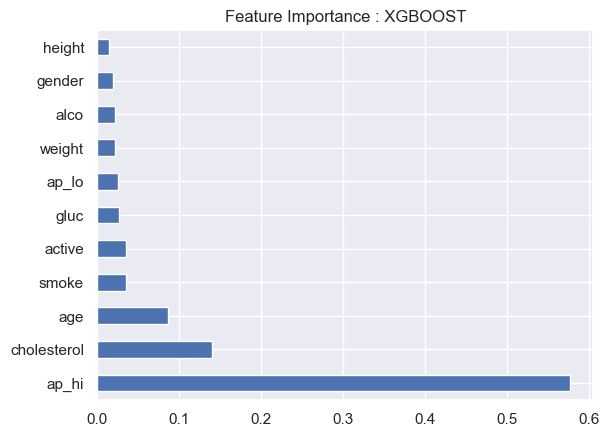

In [21]:
feat_importances = pd.Series(xgb_model.feature_importances_, index=x.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.title('Feature Importance : XGBOOST')

Text(0.5, 1.0, 'Feature Importance : Random Forest')

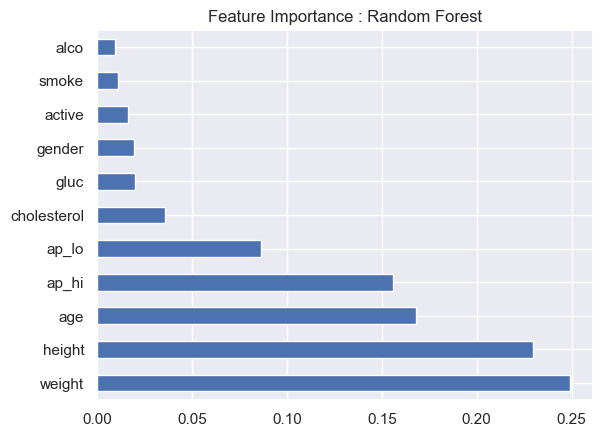

In [22]:
feat_importances = pd.Series(rc.feature_importances_, index=x.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.title('Feature Importance : Random Forest')

Text(0.5, 1.0, 'Feature Importance : Decision Tree')

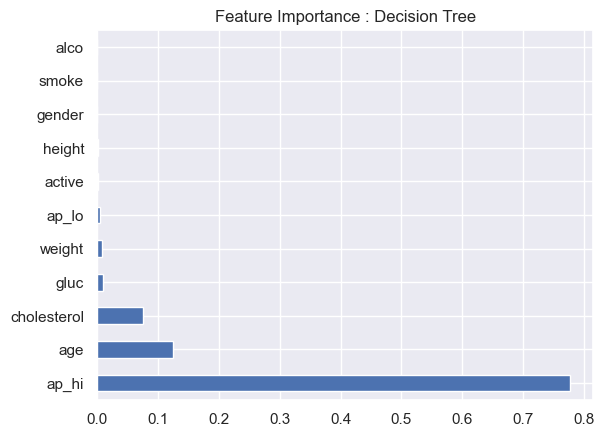

In [23]:
feat_importances = pd.Series(dc.feature_importances_, index=x.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.title('Feature Importance : Decision Tree')